# Visualising Mode Share Evolution
This section demonstrates how to plot the mode share evolution from the Londinium scenario, comparing the initial and final iterations. The plot will help illustrate behavioural adaptation and mode choice change in MATSim.

# Mode Share Analysis Including All Modes
This section calculates and visualises mode shares for all available modes (including car) using the raw legs output file. This ensures no mode is omitted from the analysis.

In [1]:
import pandas as pd

# Inspect columns in the legs file to find the correct mode column
legs_file = r'C:\Users\gy21jw\Coding\matsim-day\londinium_r0\outputs\ITERS\it.99\99.legs.csv.gz'
df_legs = pd.read_csv(legs_file)
print(df_legs.columns)


Index(['person;trip_id;dep_time;trav_time;wait_time;distance;mode;network_mode;start_link;start_x;start_y;end_link;end_x;end_y;access_stop_id;egress_stop_id;transit_line;transit_route;vehicle_id'], dtype='object')


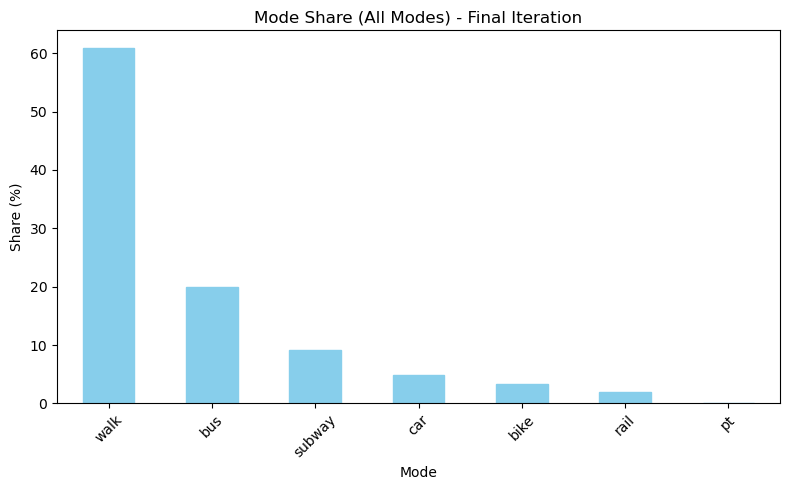

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Define column names
columns = ['person', 'trip_id', 'dep_time', 'trav_time', 'wait_time', 'distance', 'mode', 'network_mode', 'start_link', 'start_x', 'start_y', 'end_link', 'end_x', 'end_y', 'access_stop_id', 'egress_stop_id', 'transit_line', 'transit_route', 'vehicle_id']

# Load the legs file with correct parsing
legs_file = r'C:\Users\gy21jw\Coding\matsim-day\londinium_r0\outputs\ITERS\it.99\99.legs.csv.gz'
df_legs = pd.read_csv(legs_file, sep=';', names=columns, header=0)

# Calculate mode share for all modes
mode_counts = df_legs['mode'].value_counts().sort_values(ascending=False)
mode_share = (mode_counts / mode_counts.sum()) * 100

# Plot mode share for all modes
plt.figure(figsize=(8,5))
mode_share.plot(kind='bar', color='skyblue', edgecolor='skyblue')
plt.title('Mode Share (All Modes) - Final Iteration')
plt.ylabel('Share (%)')
plt.xlabel('Mode')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


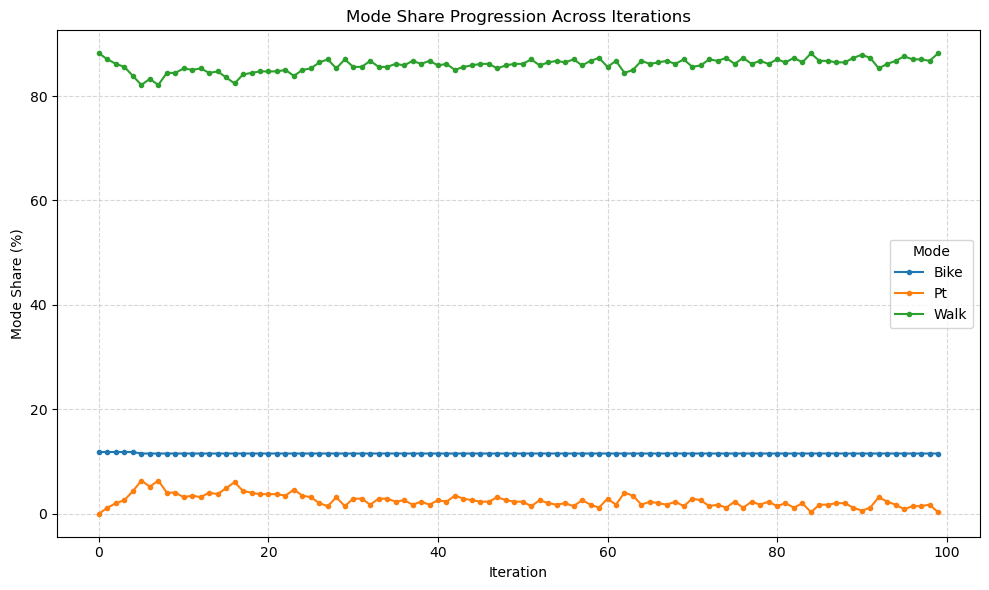

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load mode share summary for all iterations
modestats_file = r'C:\Users\gy21jw\Coding\matsim-day\londinium_r0\outputs\modestats.csv'
df_mode = pd.read_csv(modestats_file, sep=';')

plt.figure(figsize=(10,6))
for col in df_mode.columns:
    if col != 'iteration':
        plt.plot(
            df_mode['iteration'],
            df_mode[col]*100,
            marker='.',
            label=col.capitalize()
                )
plt.title('Mode Share Progression Across Iterations')
plt.xlabel('Iteration')
plt.ylabel('Mode Share (%)')
plt.legend(title='Mode')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


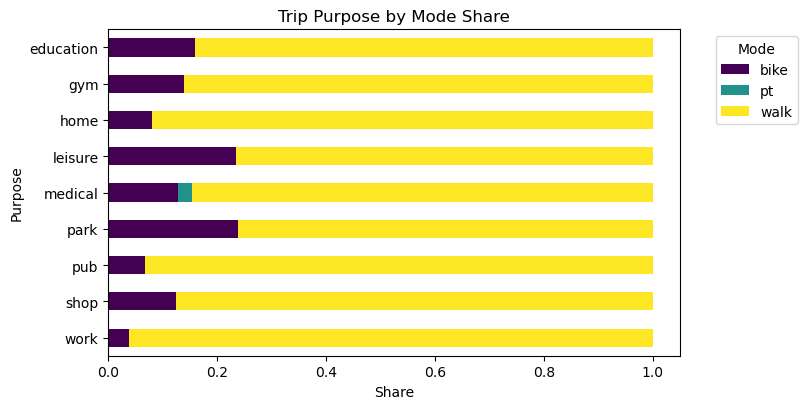

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the mode share per purpose data
csv_path = r"C:\Users\gy21jw\Coding\matsim-day\londinium_r0\outputs\analysis\population\mode_share_per_purpose.csv"
df = pd.read_csv(csv_path)

# Pivot for stacked bar plot and order index alphabetically
pivot = df.pivot(index='purpose', columns='main_mode', values='share').fillna(0)
pivot = pivot.sort_index(ascending=False)

# Plot with reduced width and swapped axes
ax = pivot.plot(kind='barh', stacked=True, colormap='viridis', figsize=(7,4.2))
plt.xlabel('Share')
plt.ylabel('Purpose')
plt.title('Trip Purpose by Mode Share')
plt.tight_layout()
plt.legend(title='Mode', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

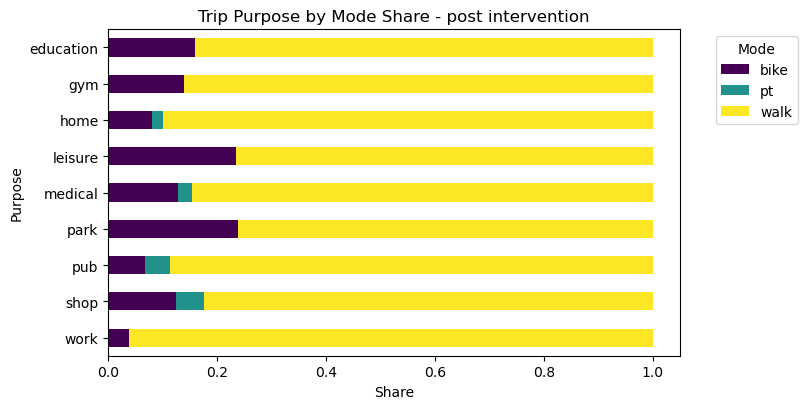

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the mode share per purpose data
csv_path = r"C:\Users\gy21jw\Coding\matsim-day\londinium_r1\outputs\analysis\population\mode_share_per_purpose.csv"
df = pd.read_csv(csv_path)

# Pivot for stacked bar plot and order index alphabetically
pivot = df.pivot(index='purpose', columns='main_mode', values='share').fillna(0)
pivot = pivot.sort_index(ascending=False)

# Plot with reduced width and swapped axes
ax = pivot.plot(kind='barh', stacked=True, colormap='viridis', figsize=(7,4.2))
plt.xlabel('Share')
plt.ylabel('Purpose')
plt.title('Trip Purpose by Mode Share - post intervention')
plt.tight_layout()
plt.legend(title='Mode', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Car links and car restrictions

In [6]:
import genet
import os
from pprint import pprint

path_to_matsim_network = r"C:\Users\gy21jw\Coding\matsim-day\londinium_r1\data\network"

network = os.path.join(path_to_matsim_network, "network.xml")
schedule = os.path.join(path_to_matsim_network, "schedule.xml")
vehicles = os.path.join(path_to_matsim_network, "vehicles.xml")

c:\Users\gy21jw\AppData\Local\miniforge3\envs\genet\Lib\site-packages\keplergl\keplergl.py:2: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_string


In [7]:
from genet import read_matsim
n = read_matsim(
    path_to_network=network, epsg="epsg:27700", path_to_schedule=schedule, path_to_vehicles=vehicles
)

## Find 'car' links

In [8]:
# List all links that allow 'car' as a mode
car_links = [(link_id, link_data) for link_id, link_data in n.links() if 'car' in link_data['modes']]
print(f"Number of links allowing 'car': {len(car_links)}")
pprint([link_id for link_id, _ in car_links][:10])  # Show first 10 link IDs

Number of links allowing 'car': 14854
['5221367055208821113_5221367055802781711',
 '5221367055802781711_5221367056646691317',
 '5221367055802781711_5221367055208821113',
 '5221367056646691317_5221367055802781711',
 '5221367040529820963_5221367040559772789',
 '5221367040559772789_5221367040529820963',
 '5221367045461474245_5221367045353012165',
 '5221367045353012165_5221367045461474245',
 '5221367057608960961_5221367057497733919',
 '5221367057497733919_5221367057608960961']


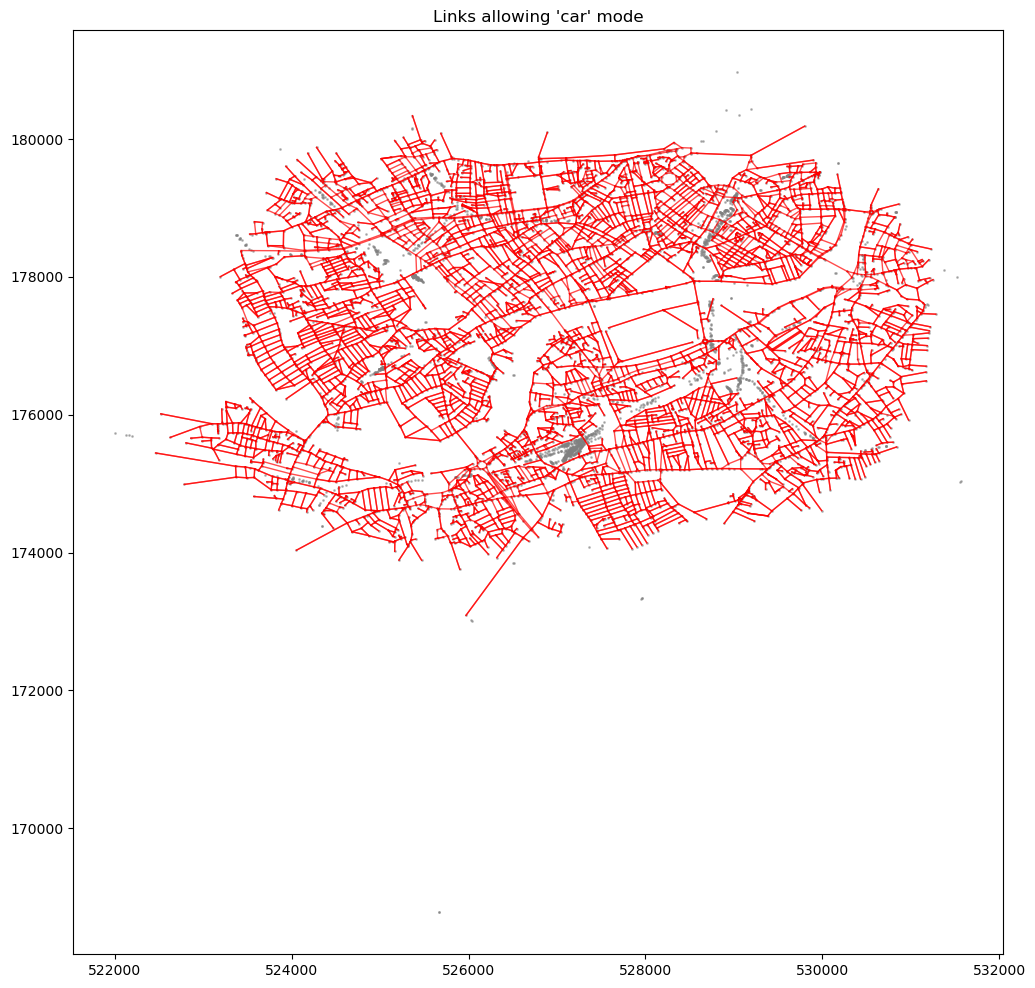

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 12))

# Plot all nodes
node_x = [data['x'] for node_id, data in n.nodes()]
node_y = [data['y'] for node_id, data in n.nodes()]
ax.scatter(node_x, node_y, s=1, color='grey', alpha=0.5)

# Plot car links in red
for link_id, link_data in car_links:
    from_node = n.node(link_data['from'])
    to_node = n.node(link_data['to'])
    ax.plot([from_node['x'], to_node['x']], [from_node['y'], to_node['y']], color='red', linewidth=1, alpha=0.7)

plt.title("Links allowing 'car' mode")
plt.show()

# Identify Priority Links for Intervention
This cell finds links with high car-induced congestion (vol_car / congestion_index) and high public transport volume (vol_pt), supporting evidence-based intervention planning.

In [10]:
import pandas as pd

# Load traffic statistics by link
traffic_file = r"C:\Users\gy21jw\Coding\matsim-day\londinium_r0\outputs\analysis\traffic\traffic_stats_by_link_daily.csv"
df = pd.read_csv(traffic_file)

# Calculate car congestion metric
df['car_congestion'] = df['vol_car'] / df['congestion_index']

# Filter for links with high car congestion and high PT volume
# threshold_car = df['car_congestion'].quantile(0.8)
threshold_car = 5.0210
# threshold_pt = df['vol_pt'].quantile(0.90)
priority_links = df[(df['car_congestion'] >= threshold_car)]

In [27]:
# Display priority links for intervention
print("Links with car-induced congestion above threshold:")
priority_links[['link_id', 'vol_car', 'congestion_index', 'vol_pt', 'car_congestion']].sort_values(by='vol_pt', ascending=False)

Links with car-induced congestion above threshold:


,link_id,vol_car,congestion_index,vol_pt,car_congestion
14150,10126,5.0,0.995804,719.0,5.021068
14296,2033,5.0,0.983461,579.0,5.084087
1849,5221366802639839413_5221366802684565713,5.0,0.926603,578.0,5.396053
13804,6,5.0,0.981601,578.0,5.093722
11829,2239,5.0,0.985861,578.0,5.071709
11086,1605,5.0,0.981181,578.0,5.095899
6815,6682,5.0,0.980371,508.0,5.100111
14814,3507,5.0,0.987396,504.0,5.063826
3007,5221366814104373975_5221366814103326521,5.0,0.923008,441.0,5.417074
13272,9696,5.0,0.979553,441.0,5.104368


In [21]:
!{sys.executable} -m pip install tabulate

  Using cached tabulate-0.9.0-py3-none-any.whl.metadata (34 kB)
Using cached tabulate-0.9.0-py3-none-any.whl (35 kB)


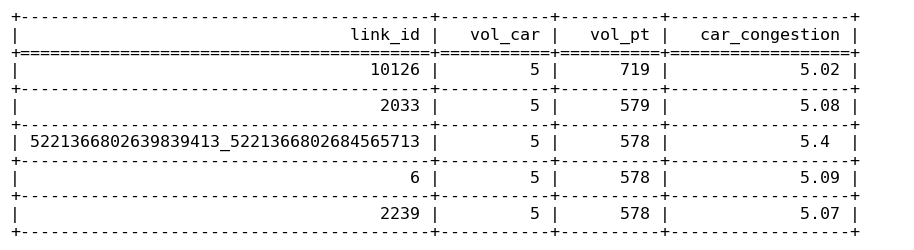

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate

# Specify the column order
cols = ['link_id', 'vol_car', 'vol_pt', 'car_congestion']

# Select, sort, and reindex top 5 priority links
top5 = priority_links[cols].sort_values(by='vol_pt', ascending=False).head(5)
top5[cols[1:]] = top5[cols[1:]].round(2)  # Round numeric columns

# Reindex to ensure column order
top5 = top5.reindex(columns=cols)

# Create table string with tabulate
table_str = tabulate(top5, headers=cols, tablefmt='grid', showindex=False)

# Plot the table string as text
fig, ax = plt.subplots(figsize=(10, 2))
ax.axis('off')
ax.text(0, 1, table_str, fontsize=12, family='monospace', va='top')
plt.tight_layout()
plt.savefig(r'C:\Users\gy21jw\Coding\matsim-day\londinium_r0\scenario dashboard visualisations\top5_priority_links.png', dpi=300)
plt.show()

Skipped 8431 links without geometry.


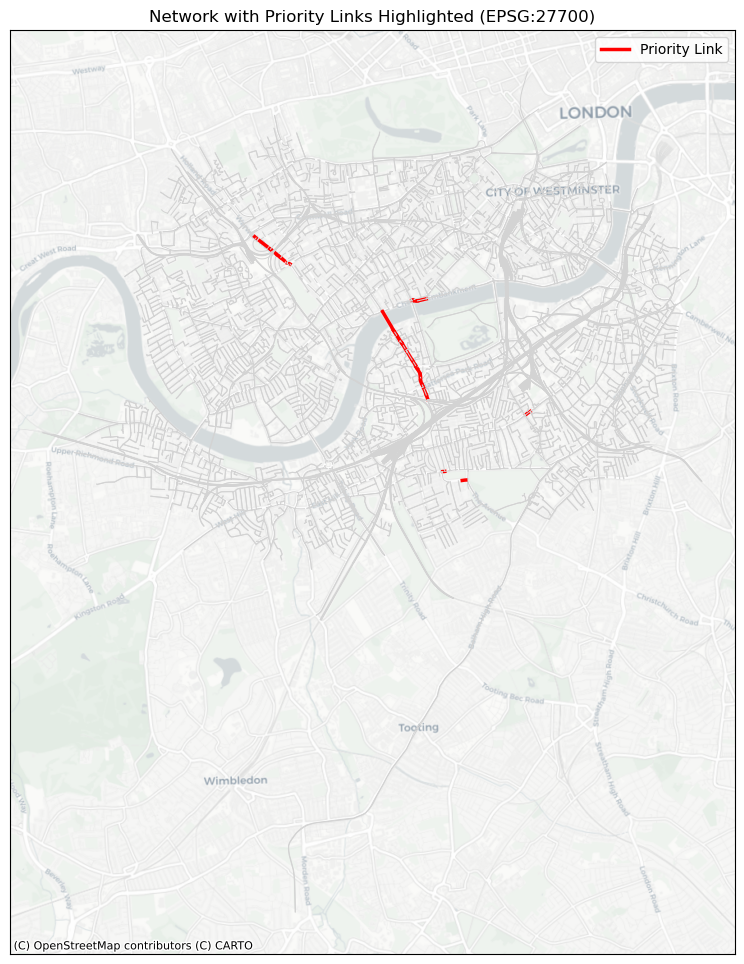

In [11]:
import genet
import os
import matplotlib.pyplot as plt
import contextily as ctx
import folium

# Get priority link IDs
priority_link_ids = set(priority_links['link_id'])

# Plot n network (EPSG:27700) with CartoDB Light basemap, no axis labels or ticks
fig, ax = plt.subplots(figsize=(12,12))
missing_geometry = 0
for link_id, link in n.links():
    if 'geometry' in link:
        coords = link['geometry'].coords
        xs, ys = zip(*coords)
        if link_id in priority_link_ids:
            ax.plot(xs, ys, color='red', linewidth=2.5, label='Priority Link' if 'Priority Link' not in ax.get_legend_handles_labels()[1] else "")
        else:
            ax.plot(xs, ys, color='lightgrey', linewidth=0.7)
    else:
        missing_geometry += 1
if missing_geometry > 0:
    print(f"Skipped {missing_geometry} links without geometry.")
ax.set_title('Network with Priority Links Highlighted (EPSG:27700)')
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, crs='epsg:27700')
ax.set_aspect("equal")
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_xticks([])
ax.set_yticks([])
plt.legend()
plt.show()

# restrict battersea bridge from cars

# END